# Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, minmax_scale, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
import pickle

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# As per question: 

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
# (Parents/children aboard), and Fare to predict whether a passenger
# survived.

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
To_col_name = 'Survived'
snd_col = data.pop(To_col_name)

data.insert(6, To_col_name, snd_col)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [6]:
# Check the null value:

data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

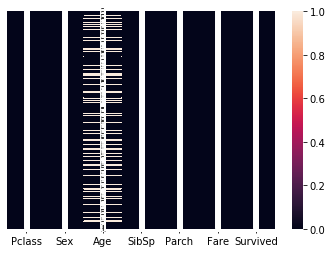

In [7]:
# Check the null value using heatmap:

sns.heatmap(data.isnull(), yticklabels=False, annot=True)
plt.show()

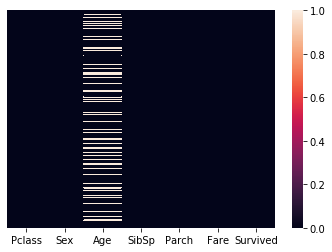

In [8]:
# Check the null value using heatmap:

sns.heatmap(data.isnull(), yticklabels=False)

In [9]:
age_median = data['Age'].median()
age_mean = data['Age'].mean()

age_median, age_mean

(28.0, 29.69911764705882)

In [10]:
# Based on median value fill the nan value

data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


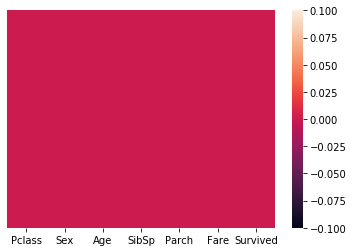

In [11]:
# Again check in Age column have nan value or not.

sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

In [12]:
# map: male:1 and female:2

data['Sex'] = data['Sex'].map({'male':1, 'female': 0})
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


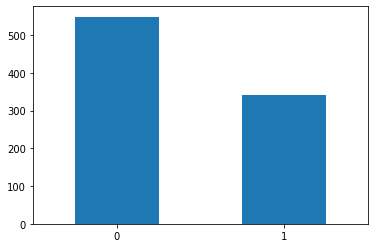

In [14]:
count_classes = pd.value_counts(data['Survived'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.show()

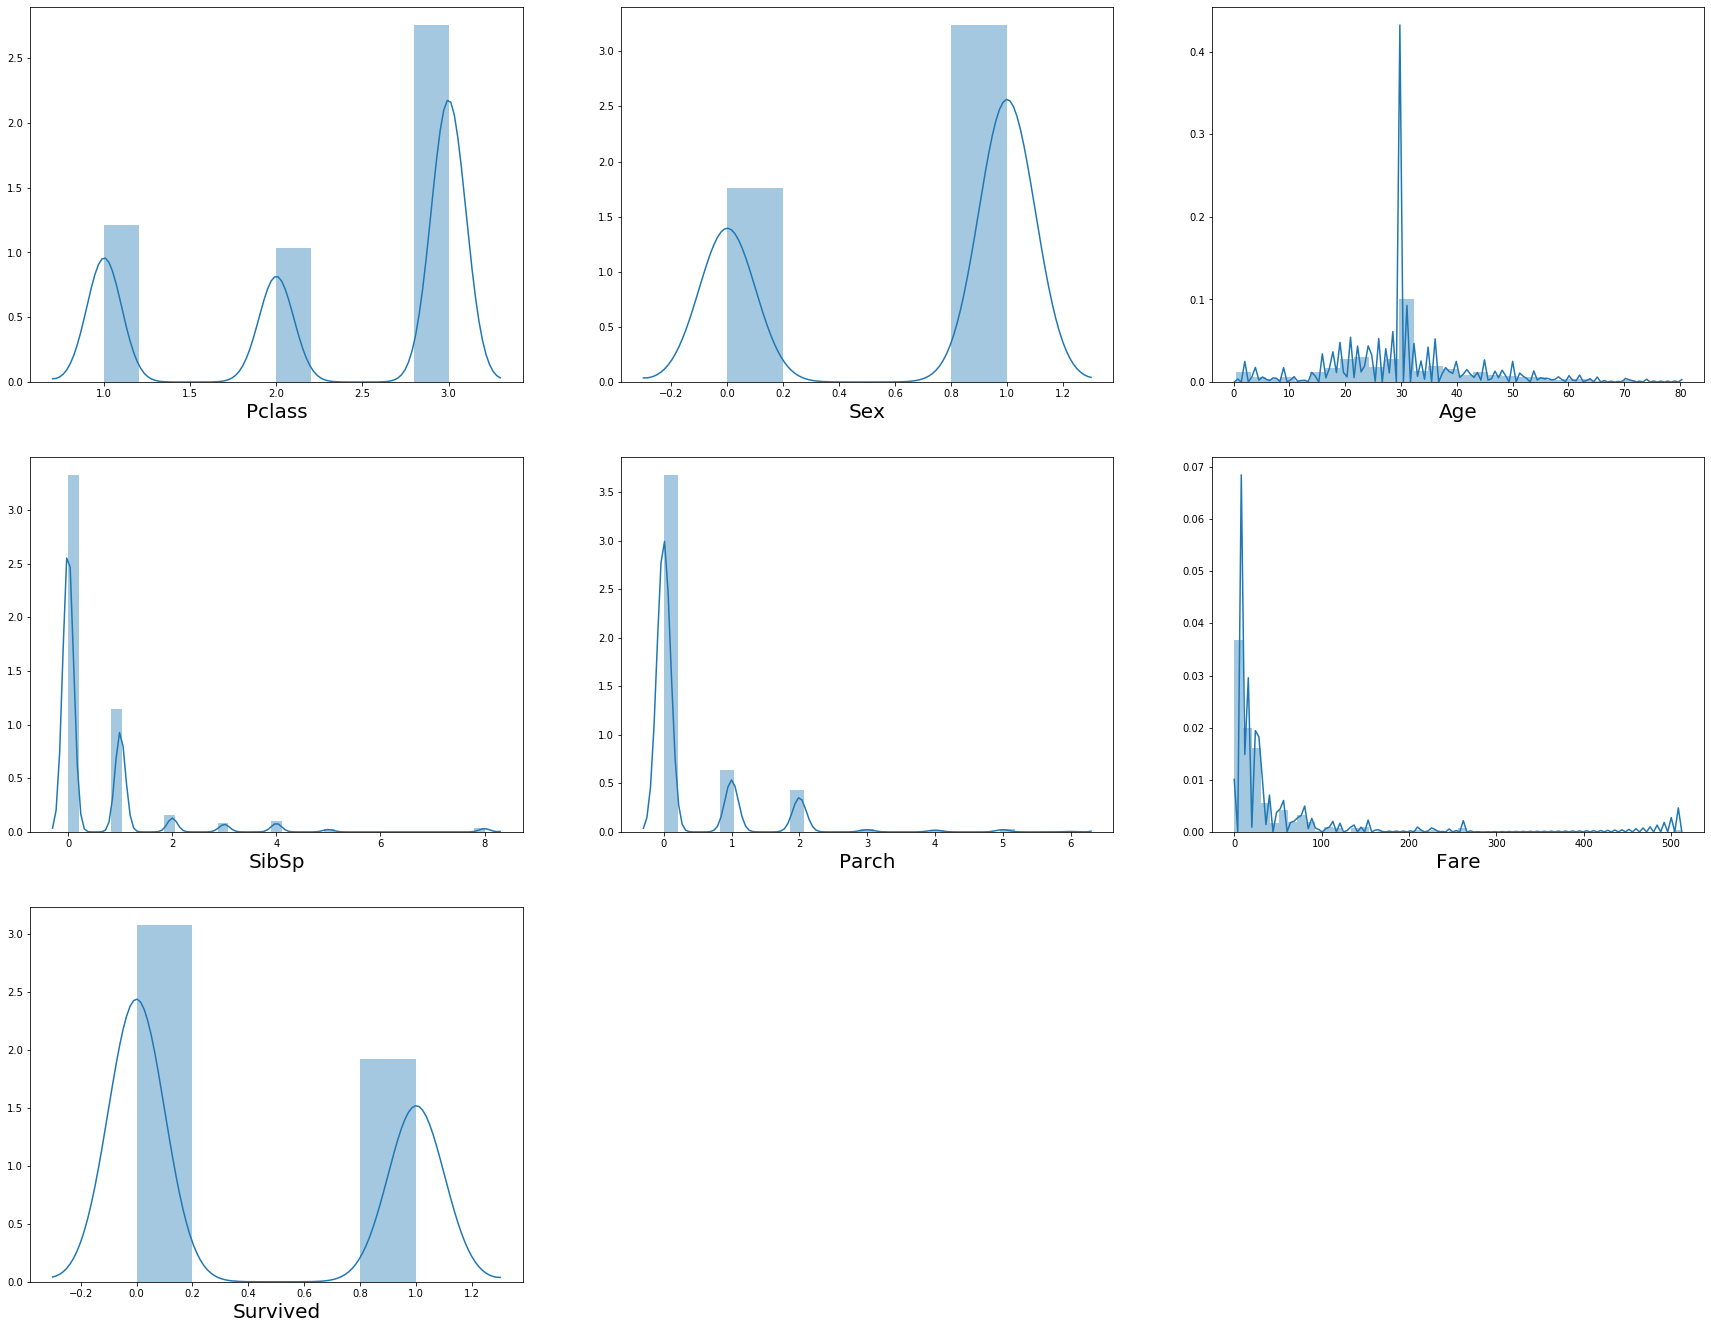

In [16]:
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:

# Check The Relation with quality

# Y = data['Survived']
# X = data.drop(columns=['Survived'])
# plt.figure(figsize=(20,30), facecolor='white')
# plotnumber = 1

# for column in X:
#     if plotnumber<=15 :
#         ax = plt.subplot(5,3,plotnumber)
#         plt.scatter(X[column], Y)
#         plt.xlabel(column,fontsize=20)
#         plt.ylabel('Survived',fontsize=20)
#     plotnumber+=1
# plt.tight_layout()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

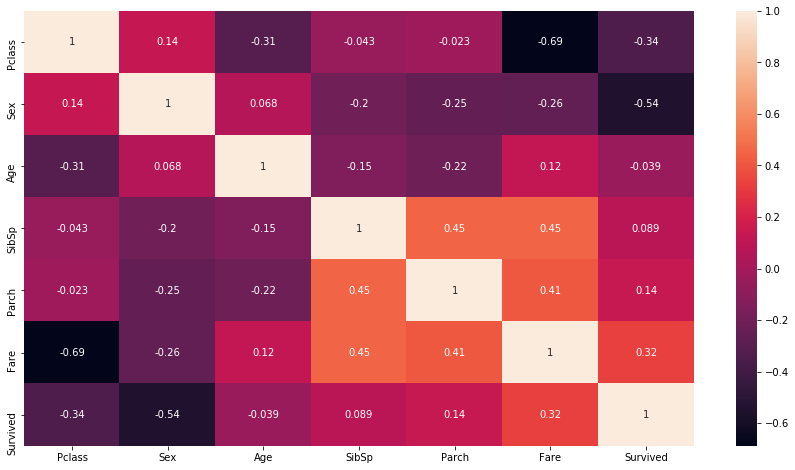

In [19]:
# Check the multicollinearity factor

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

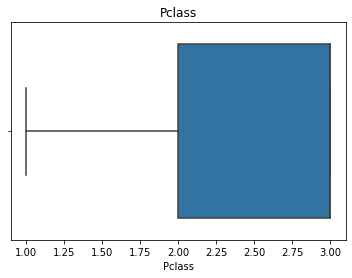

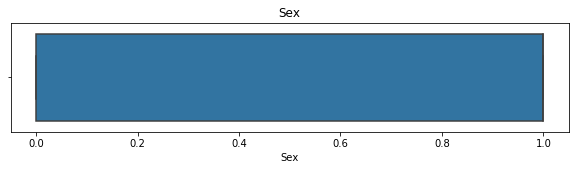

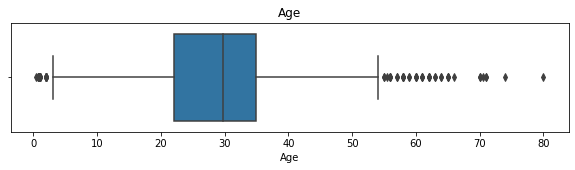

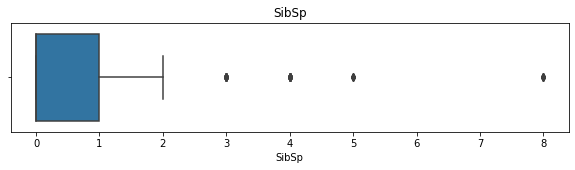

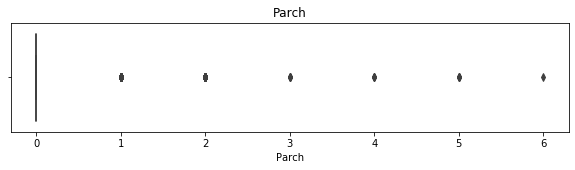

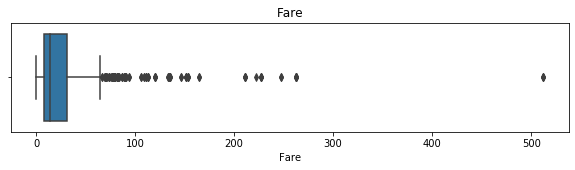

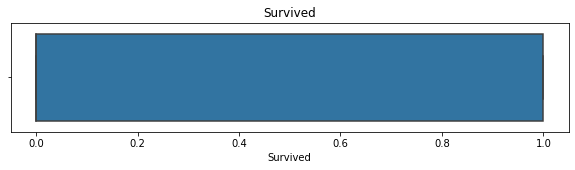

<Figure size 720x144 with 0 Axes>

In [20]:
# decting outliers

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

In [21]:
# Handle the outliers

# Age acidity columns

IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
lower = data['Age'].quantile(0.25) - (IQR * 1.5)
upper = data['Age'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['Age']>=upper, 'Age']=upper
data.loc[df['Age']<=lower, 'Age']=lower

IQR: 13.0,  lower: 2.5,  upper: 54.5


In [23]:

# SibSp acidity columns

IQR = data['SibSp'].quantile(0.75) - data['SibSp'].quantile(0.25)
lower = data['SibSp'].quantile(0.25) - (IQR * 1.5)
upper = data['SibSp'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['SibSp']>=upper, 'SibSp']=upper
# data.loc[df['SibSp']<=lower, 'SibSp']=lower

IQR: 1.0,  lower: -1.5,  upper: 2.5


In [24]:


# Parch acidity columns

IQR = data['Parch'].quantile(0.75) - data['Parch'].quantile(0.25)
lower = data['Parch'].quantile(0.25) - (IQR * 1.5)
upper = data['Parch'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['Parch']>=upper, 'Parch']=upper
# data.loc[df['Parch']<=lower, 'Parch']=lower

IQR: 0.0,  lower: 0.0,  upper: 0.0


In [25]:


# Fare acidity columns

IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
lower = data['Fare'].quantile(0.25) - (IQR * 1.5)
upper = data['Fare'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['Fare']>=upper, 'Fare']=upper
# data.loc[df['Fare']<=lower, 'Fare']=lower

IQR: 23.0896,  lower: -26.724,  upper: 65.6344


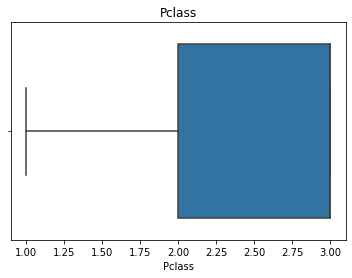

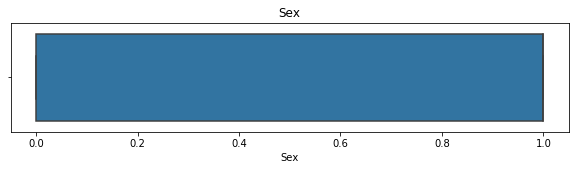

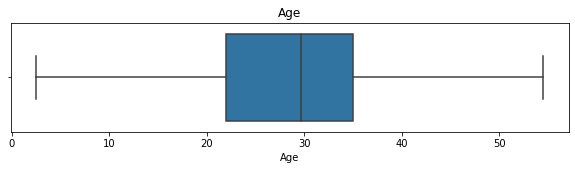

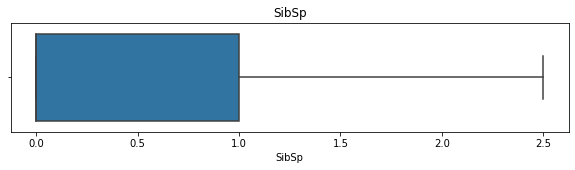

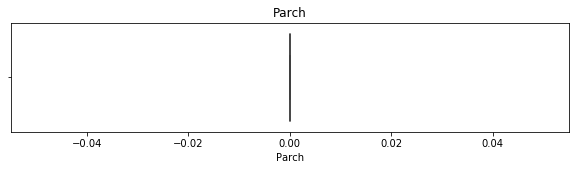

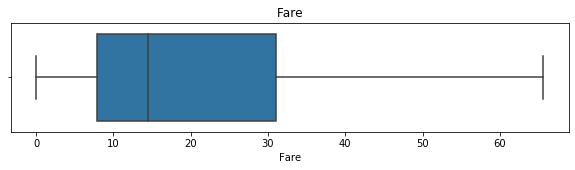

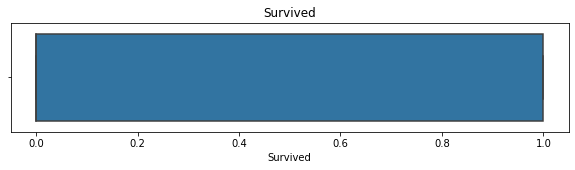

<Figure size 720x144 with 0 Axes>

In [26]:
# decting outliers

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


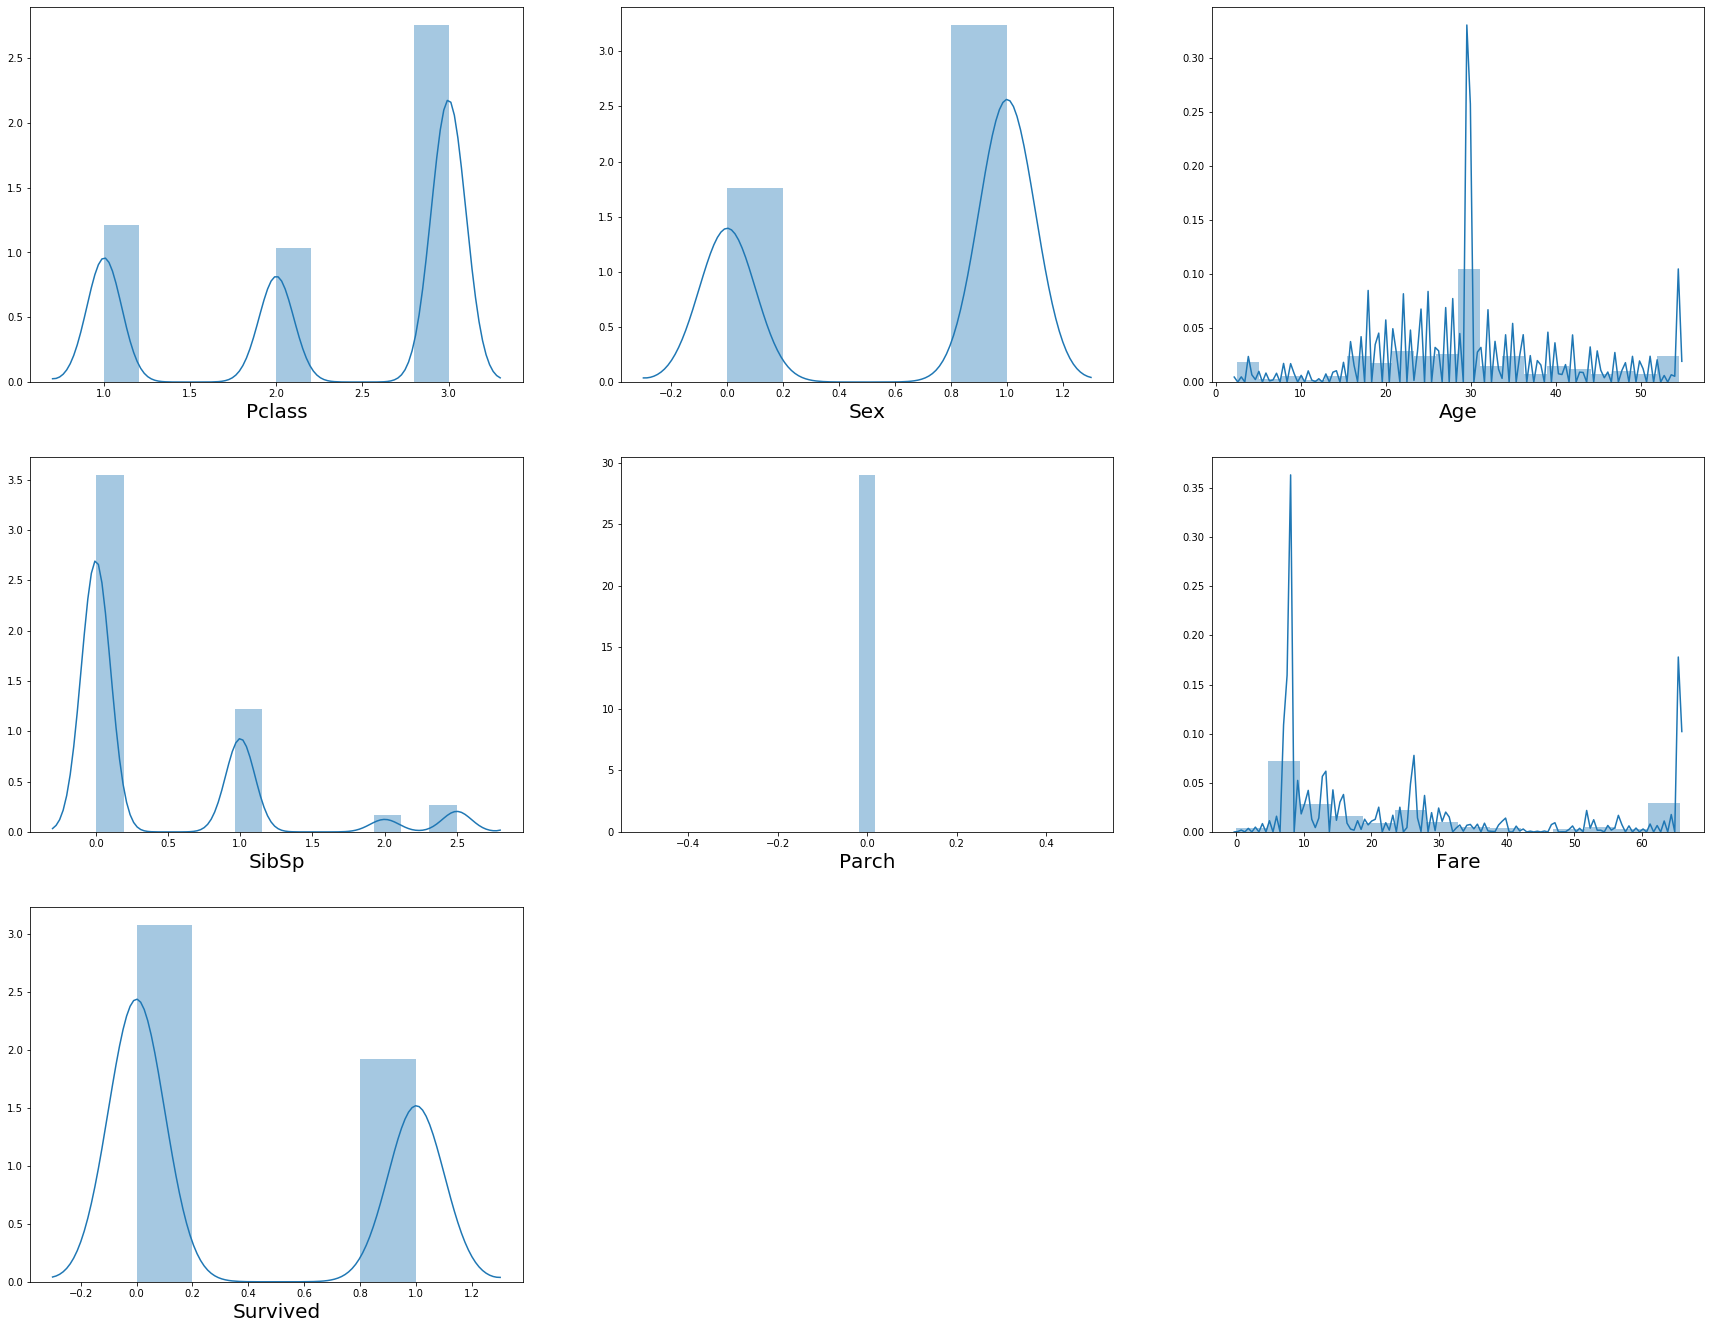

In [27]:
# Again Check the data distribution after handle the outliers

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [29]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1.0,0.0,7.2500,0
1,1,0,38.0,1.0,0.0,65.6344,1
2,3,0,26.0,0.0,0.0,7.9250,1
3,1,0,35.0,1.0,0.0,53.1000,1
4,3,1,35.0,0.0,0.0,8.0500,0


In [30]:
Y = data['Survived']
X = data.drop('Survived', axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=150)

In [32]:
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.fit_transform(x_test)

In [33]:
decision1 = DecisionTreeClassifier()
decision1.fit(x_scaled_train, y_train)

DecisionTreeClassifier()

In [34]:
# Check Accuracy based on Train data

y_predict1 = decision1.predict(x_scaled_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict1))

Based On trian Data


Confusion_matrix: 
 [[360   3]
 [ 17 199]] 

Accuracy_score:  0.9654576856649395 

classification_report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       363
           1       0.99      0.92      0.95       216

    accuracy                           0.97       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.97      0.97      0.97       579



In [36]:
# Based on Test Data

y_predict2 = decision1.predict(x_scaled_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict2), '\n')
print("Accuracy_score: ", accuracy_score(y_test y_predict2), '\n')
print("classification_report: \n\n", classification_report(y_test, y_predict2))

Based On test Data


Confusion_matrix: 
 [[152  34]
 [ 50  76]] 

Accuracy_score:  0.7307692307692307 

classification_report: 

               precision    recall  f1-score   support

           0       0.75      0.82      0.78       186
           1       0.69      0.60      0.64       126

    accuracy                           0.73       312
   macro avg       0.72      0.71      0.71       312
weighted avg       0.73      0.73      0.73       312



In [40]:
decision2 = DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

grid_search = GridSearchCV(estimator = decision2,
                     param_grid = grid_param,
                     cv=10,
                    n_jobs =-1)

In [41]:
grid_search.fit(x_scaled_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [42]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 6, 'min_samples_split': 3, 'splitter': 'random'}


In [45]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 6, 
                                  min_samples_split = 3, splitter = 'random')

In [48]:
decision_tree.fit(x_scaled_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=6,
                       min_samples_split=3, splitter='random')

In [53]:
# Check Accuracy based on Train data

y_predict1 = decision_tree.predict(x_scaled_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict1))

Based On trian Data


Confusion_matrix: 
 [[323  40]
 [ 77 139]] 

Accuracy_score:  0.7979274611398963 

classification_report: 

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       363
           1       0.78      0.64      0.70       216

    accuracy                           0.80       579
   macro avg       0.79      0.77      0.78       579
weighted avg       0.80      0.80      0.79       579



In [51]:
# Based on Test Data

y_predict2 = decision_tree.predict(x_scaled_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict2), '\n')
print("Accuracy_score: ", accuracy_score(y_test, y_predict2), '\n')
print("classification_report: \n\n", classification_report(y_test, y_predict2))

Based On test Data


Confusion_matrix: 
 [[167  19]
 [ 36  90]] 

Accuracy_score:  0.8237179487179487 

classification_report: 

               precision    recall  f1-score   support

           0       0.82      0.90      0.86       186
           1       0.83      0.71      0.77       126

    accuracy                           0.82       312
   macro avg       0.82      0.81      0.81       312
weighted avg       0.82      0.82      0.82       312



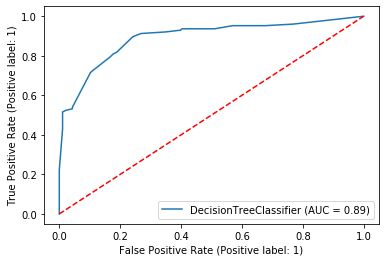

In [62]:
metrics.plot_roc_curve(decision_tree, x_scaled_test, y_test)
metrics.roc_auc_score(y_test, y_predict2, average=None)
plt.plot([0,1], [0,1], '--r')
plt.show()

In [63]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1.0,0.0,7.2500,0
1,1,0,38.0,1.0,0.0,65.6344,1
2,3,0,26.0,0.0,0.0,7.9250,1
3,1,0,35.0,1.0,0.0,53.1000,1
4,3,1,35.0,0.0,0.0,8.0500,0


In [67]:
filename = "model.pickle"
pickle.dump(decision_tree, open(filename, 'wb'))

In [68]:
loaded_model = pickle.load(open(filename, 'rb'))
pred = loaded_model.predict(scaler.transform([[1, 1, 38, 1, 0, 65.6344]]))
pred

array([0], dtype=int64)